# Compare BetaVAE models

In [4]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from specvae import utils

In [5]:
def load_experiment_from_path(filepath):
    return pd.read_csv(filepath, index_col=0)

def load_experiment(dataset, experiment_name, filename='experiment.csv', base_path=None):
    if base_path is None:
        filepath = utils.get_project_path() / '.model' / dataset / experiment_name / filename
    else:
        filepath = base_path / dataset / experiment_name / filename
    return load_experiment_from_path(filepath)

def load_experiment_sessions(dataset, experiment_name, filenames=['experiment.csv'], base_path=None):
    dfs = [load_experiment(dataset, experiment_name, filename, base_path) for filename in filenames]
    merged_df = pd.concat(dfs, ignore_index=True)
    return merged_df

In [6]:
indices = [0,1]
df = load_experiment_sessions('HMDB', 'betavae_capacity_nextron', 
    ['experiment01_dms.csv', 'experiment02_dms.csv', 'experiment03_dms.csv', 
     'experiment04_dms.csv', 'experiment05_dms.csv', 'experiment06_dms.csv'])
# df2 = load_experiment_sessions('HMDB', 'betavae_capacity_nextron', 
#     ['experiment01.csv', 'experiment02.csv', 'experiment03.csv', 'experiment04.csv', 
#      'experiment05.csv', 'experiment06.csv'])
# df = pd.concat([df1, df2], ignore_index=True)
df.to_csv(utils.get_project_path() / '.model' / 'betavae_hmdb.csv')
df

,name,dataset,full_model_name,layer_config,input_columns,param_latent_dim,param_beta,param_limit,param_dropout,param_max_mz,...,"m.train.factor_vae.(0, 1)","m.train.factor_vae.(1, 0)","m.train.mig.(0, 1)","m.train.mig.(1, 0)","m.eval.beta_vae.(0, 1)","m.eval.beta_vae.(1, 0)","m.eval.factor_vae.(0, 1)","m.eval.factor_vae.(1, 0)","m.eval.mig.(0, 1)","m.eval.mig.(1, 0)"
0,betavae_capacity,HMDB,betavae_capacity_20-1600-2-1600-20_01 (24-12-2...,"[[20, 1600, 2], [2, 1600, 20]]",['spectrum'],2,0.01,1.0,0.0,2500.0,...,1.0000,1.0000,1.628442e-01,1.676013e-01,1.0000,1.0000,1.0000,1.0000,1.628442e-01,1.676013e-01
1,betavae_capacity,HMDB,betavae_capacity_20-800-2-800-20_01 (24-12-202...,"[[20, 800, 2], [2, 800, 20]]",['spectrum'],2,0.01,1.0,0.0,2500.0,...,1.0000,1.0000,2.721317e-01,2.740826e-01,1.0000,1.0000,1.0000,1.0000,2.721317e-01,2.740826e-01
2,betavae_capacity,HMDB,betavae_capacity_20-400-2-400-20_01 (24-12-202...,"[[20, 400, 2], [2, 400, 20]]",['spectrum'],2,0.01,1.0,0.0,2500.0,...,0.5799,0.5836,1.059644e-01,1.077708e-01,1.0000,0.9998,0.5892,0.5698,1.059644e-01,1.077708e-01
3,betavae_capacity,HMDB,betavae_capacity_20-200-2-200-20_01 (24-12-202...,"[[20, 200, 2], [2, 200, 20]]",['spectrum'],2,0.01,1.0,0.0,2500.0,...,1.0000,1.0000,1.046896e-01,1.066805e-01,1.0000,1.0000,1.0000,1.0000,1.046896e-01,1.066805e-01
4,betavae_capacity,HMDB,betavae_capacity_20-100-2-100-20_01 (24-12-202...,"[[20, 100, 2], [2, 100, 20]]",['spectrum'],2,0.01,1.0,0.0,2500.0,...,1.0000,1.0000,0.000000e+00,5.053520e-17,1.0000,1.0000,1.0000,1.0000,0.000000e+00,5.053520e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,betavae_capacity,HMDB,betavae_capacity_100-800-100-2-800-100_06 (25-...,"[[100, 800, 100, 2], [2, 800, 100]]",['spectrum'],2,2.00,1.0,0.0,2500.0,...,0.7276,0.7083,0.000000e+00,0.000000e+00,0.9316,0.9258,0.7340,0.6934,0.000000e+00,0.000000e+00
518,betavae_capacity,HMDB,betavae_capacity_100-400-100-2-400-100_06 (25-...,"[[100, 400, 100, 2], [2, 400, 100]]",['spectrum'],2,2.00,1.0,0.0,2500.0,...,1.0000,1.0000,1.010586e-16,1.010627e-16,0.8384,0.8744,1.0000,1.0000,1.010586e-16,1.010627e-16
519,betavae_capacity,HMDB,betavae_capacity_100-200-100-2-200-100_06 (25-...,"[[100, 200, 100, 2], [2, 200, 100]]",['spectrum'],2,2.00,1.0,0.0,2500.0,...,1.0000,1.0000,0.000000e+00,8.009156e-17,0.9936,0.9860,1.0000,1.0000,0.000000e+00,8.009156e-17
520,betavae_capacity,HMDB,betavae_capacity_100-100-90-2-100-100_06 (25-1...,"[[100, 100, 90, 2], [2, 100, 100]]",['spectrum'],2,2.00,1.0,0.0,2500.0,...,1.0000,1.0000,0.000000e+00,0.000000e+00,0.9000,0.8942,1.0000,1.0000,0.000000e+00,0.000000e+00


In [4]:
columns = list(df.columns)
params = list(filter(lambda x: x.startswith('param_'), columns))
values = list(filter(lambda x: x.startswith('m_'), columns))
others = list(filter(lambda x: not x.startswith('m_') and not x.startswith('param_'), columns))
# Separate by split:
train_values = list(filter(lambda x: x.startswith('m_train_'), columns))
valid_values = list(filter(lambda x: x.startswith('m_valid_'), columns))
test_values = list(filter(lambda x: x.startswith('m_test_'), columns))

In [5]:
import ast
def is_symmetric(row):
    layer_config = ast.literal_eval(row['layer_config'])
    return len(layer_config[0]) == len(layer_config[1])

def depth(row):
    layer_config = ast.literal_eval(row['layer_config'])
    lencoder, ldecoder = len(layer_config[0]) - 2, len(layer_config[1]) - 2
    return max(lencoder, ldecoder)

df['is_symmetric'] = df.apply(is_symmetric, axis=1)
df['depth'] = df.apply(depth, axis=1)


### Add random disentanglement scores for testing

In [6]:
# import itertools as it
# pcols =  ['m.train.factor_vae.'       + str(p) for p in it.permutations(indices, len(indices))]
# pcols += ['m.valid.beta_vae.'       + str(p) for p in it.permutations(indices, len(indices))]
# pcols += ['m.train.factor_vae.'     + str(p) for p in it.permutations(indices, len(indices))]
# pcols += ['m.valid.factor_vae.'     + str(p) for p in it.permutations(indices, len(indices))]
# pcols += ['m.train.mig.'            + str(p) for p in it.permutations(indices, len(indices))]
# pcols += ['m.valid.mig.'            + str(p) for p in it.permutations(indices, len(indices))]

# def random_score(row):
#     for n in pcols:
#         row[n] = np.random.random()
#     return row
# df = df.apply(random_score, axis=1)

### Prepare scores

In [7]:
import itertools as it
def prepare_scores(df, indices=[0,1,2]):
    def unpivot_by_name(df, score_name):
        def split(row):
            if 'train' in row['permutation']:
                row['permutation'] = row['permutation'].replace('m.train.' + score_name + '.', '')
                row['split'] = 'train'
            elif 'eval' in row['permutation']:
                row['permutation'] = row['permutation'].replace('m.eval.' + score_name + '.', '')
                row['split'] = 'valid'
            return row
        vars = ['m.train.' + score_name + '.' + str(p) for p in it.permutations(indices, len(indices))] + \
                ['m.eval.' + score_name + '.' + str(p) for p in it.permutations(indices, len(indices))]
        df1 = df.melt(id_vars=['full_model_name'], value_vars=vars, var_name='permutation', value_name=score_name)
        df1 = df1.apply(split, axis=1)
        return df1
    df1 = unpivot_by_name(df, 'beta_vae')
    df2 = unpivot_by_name(df, 'factor_vae')
    df3 = unpivot_by_name(df, 'mig')
    df_ = pd.merge(df1, df2, on=['full_model_name', 'split', 'permutation'])
    df_ = pd.merge(df_, df3, on=['full_model_name', 'split', 'permutation'])
    df_ = pd.merge(df_, df, on=['full_model_name'])
    return df_


In [8]:
df1 = prepare_scores(df, indices)
df1

,full_model_name,permutation,beta_vae,split,factor_vae,mig,name,dataset,layer_config,input_columns,...,"m.train.mig.(0, 1)","m.train.mig.(1, 0)","m.eval.beta_vae.(0, 1)","m.eval.beta_vae.(1, 0)","m.eval.factor_vae.(0, 1)","m.eval.factor_vae.(1, 0)","m.eval.mig.(0, 1)","m.eval.mig.(1, 0)",is_symmetric,depth
0,betavae_capacity_20-1600-2-1600-20_01 (24-12-2...,"(0, 1)",1.0000,train,1.0,1.628442e-01,betavae_capacity,HMDB,"[[20, 1600, 2], [2, 1600, 20]]",['spectrum'],...,1.628442e-01,1.676013e-01,1.0000,1.0000,1.0,1.0,1.628442e-01,1.676013e-01,True,1
1,betavae_capacity_20-1600-2-1600-20_01 (24-12-2...,"(1, 0)",1.0000,train,1.0,1.676013e-01,betavae_capacity,HMDB,"[[20, 1600, 2], [2, 1600, 20]]",['spectrum'],...,1.628442e-01,1.676013e-01,1.0000,1.0000,1.0,1.0,1.628442e-01,1.676013e-01,True,1
2,betavae_capacity_20-1600-2-1600-20_01 (24-12-2...,"(0, 1)",1.0000,valid,1.0,1.628442e-01,betavae_capacity,HMDB,"[[20, 1600, 2], [2, 1600, 20]]",['spectrum'],...,1.628442e-01,1.676013e-01,1.0000,1.0000,1.0,1.0,1.628442e-01,1.676013e-01,True,1
3,betavae_capacity_20-1600-2-1600-20_01 (24-12-2...,"(1, 0)",1.0000,valid,1.0,1.676013e-01,betavae_capacity,HMDB,"[[20, 1600, 2], [2, 1600, 20]]",['spectrum'],...,1.628442e-01,1.676013e-01,1.0000,1.0000,1.0,1.0,1.628442e-01,1.676013e-01,True,1
4,betavae_capacity_20-800-2-800-20_01 (24-12-202...,"(0, 1)",1.0000,train,1.0,2.721317e-01,betavae_capacity,HMDB,"[[20, 800, 2], [2, 800, 20]]",['spectrum'],...,2.721317e-01,2.740826e-01,1.0000,1.0000,1.0,1.0,2.721317e-01,2.740826e-01,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083,betavae_capacity_100-100-90-2-100-100_06 (25-1...,"(1, 0)",0.8942,valid,1.0,0.000000e+00,betavae_capacity,HMDB,"[[100, 100, 90, 2], [2, 100, 100]]",['spectrum'],...,0.000000e+00,0.000000e+00,0.9000,0.8942,1.0,1.0,0.000000e+00,0.000000e+00,False,2
2084,betavae_capacity_100-50-40-2-50-100_06 (25-12-...,"(0, 1)",0.7838,train,1.0,1.010676e-16,betavae_capacity,HMDB,"[[100, 50, 40, 2], [2, 50, 100]]",['spectrum'],...,1.010676e-16,5.052991e-17,0.7856,0.7392,1.0,1.0,1.010676e-16,5.052991e-17,False,2
2085,betavae_capacity_100-50-40-2-50-100_06 (25-12-...,"(1, 0)",0.7553,train,1.0,5.052991e-17,betavae_capacity,HMDB,"[[100, 50, 40, 2], [2, 50, 100]]",['spectrum'],...,1.010676e-16,5.052991e-17,0.7856,0.7392,1.0,1.0,1.010676e-16,5.052991e-17,False,2
2086,betavae_capacity_100-50-40-2-50-100_06 (25-12-...,"(0, 1)",0.7856,valid,1.0,1.010676e-16,betavae_capacity,HMDB,"[[100, 50, 40, 2], [2, 50, 100]]",['spectrum'],...,1.010676e-16,5.052991e-17,0.7856,0.7392,1.0,1.0,1.010676e-16,5.052991e-17,False,2


## Top models

In [9]:
pd.set_option("display.max_colwidth", 200)
pd.set_option('display.max_rows', 200)

### Best models w.r.t. beta_vae score grouped by beta, n_peaks and permutation

In [10]:
df1[['param_beta', 'param_max_num_peaks', 'permutation', 'layer_config', 'full_model_name', 
    'beta_vae', 'factor_vae', 'mig',
    'm_train_cos_sim', 'm_train_eu_dist', 'm_train_per_diff']].loc[
    df1.groupby(['param_beta', 'param_max_num_peaks', 'permutation'])['beta_vae'].idxmax()]

,param_beta,param_max_num_peaks,permutation,layer_config,full_model_name,beta_vae,factor_vae,mig,m_train_cos_sim,m_train_eu_dist,m_train_per_diff
0,0.01,10,"(0, 1)","[[20, 1600, 2], [2, 1600, 20]]",betavae_capacity_20-1600-2-1600-20_01 (24-12-2021_18-27-38),1.0000,1.0000,1.628442e-01,0.958490,0.166963,0.330007
1,0.01,10,"(1, 0)","[[20, 1600, 2], [2, 1600, 20]]",betavae_capacity_20-1600-2-1600-20_01 (24-12-2021_18-27-38),1.0000,1.0000,1.676013e-01,0.958490,0.166963,0.330007
116,0.01,25,"(0, 1)","[[50, 1600, 2], [2, 1600, 50]]",betavae_capacity_50-1600-2-1600-50_01 (24-12-2021_21-10-42),1.0000,1.0000,0.000000e+00,0.935805,0.304829,0.411255
117,0.01,25,"(1, 0)","[[50, 1600, 2], [2, 1600, 50]]",betavae_capacity_50-1600-2-1600-50_01 (24-12-2021_21-10-42),1.0000,1.0000,5.053344e-17,0.935805,0.304829,0.411255
232,0.01,50,"(0, 1)","[[100, 1600, 2], [2, 1600, 100]]",betavae_capacity_100-1600-2-1600-100_01 (24-12-2021_23-54-27),1.0000,1.0000,2.676676e-01,0.929225,0.352810,0.333909
233,0.01,50,"(1, 0)","[[100, 1600, 2], [2, 1600, 100]]",betavae_capacity_100-1600-2-1600-100_01 (24-12-2021_23-54-27),1.0000,1.0000,2.685911e-01,0.929225,0.352810,0.333909
352,0.10,10,"(0, 1)","[[20, 800, 2], [2, 800, 20]]",betavae_capacity_20-800-2-800-20_02 (24-12-2021_18-32-54),1.0000,0.5797,1.653452e-01,0.935705,0.218747,0.399425
353,0.10,10,"(1, 0)","[[20, 800, 2], [2, 800, 20]]",betavae_capacity_20-800-2-800-20_02 (24-12-2021_18-32-54),1.0000,0.5850,1.660718e-01,0.935705,0.218747,0.399425
464,0.10,25,"(0, 1)","[[50, 1600, 2], [2, 1600, 50]]",betavae_capacity_50-1600-2-1600-50_02 (24-12-2021_21-10-40),1.0000,1.0000,2.731931e-01,0.925781,0.330202,0.480527
465,0.10,25,"(1, 0)","[[50, 1600, 2], [2, 1600, 50]]",betavae_capacity_50-1600-2-1600-50_02 (24-12-2021_21-10-40),1.0000,1.0000,2.758782e-01,0.925781,0.330202,0.480527


### Best models w.r.t. factor_vae score grouped by beta, n_peaks and permutation

In [11]:
df1[['param_beta', 'param_max_num_peaks', 'permutation', 'layer_config', 'full_model_name', 
    'beta_vae', 'factor_vae', 'mig',
    'm_train_cos_sim', 'm_train_eu_dist', 'm_train_per_diff']].loc[
    df1.groupby(['param_beta', 'param_max_num_peaks', 'permutation'])['factor_vae'].idxmax()]

,param_beta,param_max_num_peaks,permutation,layer_config,full_model_name,beta_vae,factor_vae,mig,m_train_cos_sim,m_train_eu_dist,m_train_per_diff
0,0.01,10,"(0, 1)","[[20, 1600, 2], [2, 1600, 20]]",betavae_capacity_20-1600-2-1600-20_01 (24-12-2021_18-27-38),1.0000,1.0,1.628442e-01,0.958490,0.166963,0.330007
1,0.01,10,"(1, 0)","[[20, 1600, 2], [2, 1600, 20]]",betavae_capacity_20-1600-2-1600-20_01 (24-12-2021_18-27-38),1.0000,1.0,1.676013e-01,0.958490,0.166963,0.330007
116,0.01,25,"(0, 1)","[[50, 1600, 2], [2, 1600, 50]]",betavae_capacity_50-1600-2-1600-50_01 (24-12-2021_21-10-42),1.0000,1.0,0.000000e+00,0.935805,0.304829,0.411255
117,0.01,25,"(1, 0)","[[50, 1600, 2], [2, 1600, 50]]",betavae_capacity_50-1600-2-1600-50_01 (24-12-2021_21-10-42),1.0000,1.0,5.053344e-17,0.935805,0.304829,0.411255
232,0.01,50,"(0, 1)","[[100, 1600, 2], [2, 1600, 100]]",betavae_capacity_100-1600-2-1600-100_01 (24-12-2021_23-54-27),1.0000,1.0,2.676676e-01,0.929225,0.352810,0.333909
233,0.01,50,"(1, 0)","[[100, 1600, 2], [2, 1600, 100]]",betavae_capacity_100-1600-2-1600-100_01 (24-12-2021_23-54-27),1.0000,1.0,2.685911e-01,0.929225,0.352810,0.333909
368,0.10,10,"(0, 1)","[[20, 50, 2], [2, 50, 20]]",betavae_capacity_20-50-2-50-20_02 (24-12-2021_18-53-43),1.0000,1.0,0.000000e+00,0.935991,0.221838,0.399855
369,0.10,10,"(1, 0)","[[20, 50, 2], [2, 50, 20]]",betavae_capacity_20-50-2-50-20_02 (24-12-2021_18-53-43),1.0000,1.0,0.000000e+00,0.935991,0.221838,0.399855
464,0.10,25,"(0, 1)","[[50, 1600, 2], [2, 1600, 50]]",betavae_capacity_50-1600-2-1600-50_02 (24-12-2021_21-10-40),1.0000,1.0,2.731931e-01,0.925781,0.330202,0.480527
465,0.10,25,"(1, 0)","[[50, 1600, 2], [2, 1600, 50]]",betavae_capacity_50-1600-2-1600-50_02 (24-12-2021_21-10-40),1.0000,1.0,2.758782e-01,0.925781,0.330202,0.480527


### Best models w.r.t. MIG score grouped by beta, n_peaks and permutation

In [12]:
df1[['param_beta', 'param_max_num_peaks', 'permutation', 'layer_config', 'full_model_name', 
    'beta_vae', 'factor_vae', 'mig',
    'm_train_cos_sim', 'm_train_eu_dist', 'm_train_per_diff']].loc[
    df1.groupby(['param_beta', 'param_max_num_peaks', 'permutation'])['mig'].idxmax()]

,param_beta,param_max_num_peaks,permutation,layer_config,full_model_name,beta_vae,factor_vae,mig,m_train_cos_sim,m_train_eu_dist,m_train_per_diff
72,0.01,10,"(0, 1)","[[20, 400, 2], [2, 100, 400, 20]]",betavae_capacity_20-400-2-100-400-20_01 (24-12-2021_20-10-25),1.0000,1.0000,0.279520,0.960497,0.160749,0.328366
73,0.01,10,"(1, 0)","[[20, 400, 2], [2, 100, 400, 20]]",betavae_capacity_20-400-2-100-400-20_01 (24-12-2021_20-10-25),1.0000,1.0000,0.277559,0.960497,0.160749,0.328366
160,0.01,25,"(0, 1)","[[50, 1600, 200, 50, 2], [2, 50, 200, 1600, 50]]",betavae_capacity_50-1600-200-50-2-50-200-1600-50_01 (24-12-2021_22-11-07),1.0000,1.0000,0.438043,0.946739,0.273383,0.352144
161,0.01,25,"(1, 0)","[[50, 1600, 200, 50, 2], [2, 50, 200, 1600, 50]]",betavae_capacity_50-1600-200-50-2-50-200-1600-50_01 (24-12-2021_22-11-07),1.0000,1.0000,0.437963,0.946739,0.273383,0.352144
272,0.01,50,"(0, 1)","[[100, 100, 90, 2], [2, 90, 100, 100]]",betavae_capacity_100-100-90-2-90-100-100_01 (25-12-2021_00-49-29),1.0000,0.7487,0.544982,0.934860,0.338551,0.352333
273,0.01,50,"(1, 0)","[[100, 100, 90, 2], [2, 90, 100, 100]]",betavae_capacity_100-100-90-2-90-100-100_01 (25-12-2021_00-49-29),1.0000,0.5804,0.540748,0.934860,0.338551,0.352333
436,0.10,10,"(0, 1)","[[20, 50, 2], [2, 40, 50, 20]]",betavae_capacity_20-50-2-40-50-20_02 (24-12-2021_20-32-36),1.0000,0.8384,0.372916,0.934593,0.225423,0.405205
437,0.10,10,"(1, 0)","[[20, 50, 2], [2, 40, 50, 20]]",betavae_capacity_20-50-2-40-50-20_02 (24-12-2021_20-32-36),1.0000,0.8352,0.372673,0.934593,0.225423,0.405205
564,0.10,25,"(0, 1)","[[50, 400, 100, 2], [2, 400, 50]]",betavae_capacity_50-400-100-2-400-50_02 (24-12-2021_23-32-32),1.0000,1.0000,0.587784,0.925376,0.331993,0.501256
565,0.10,25,"(1, 0)","[[50, 400, 100, 2], [2, 400, 50]]",betavae_capacity_50-400-100-2-400-50_02 (24-12-2021_23-32-32),1.0000,1.0000,0.579601,0.925376,0.331993,0.501256


### Scores for each permutation

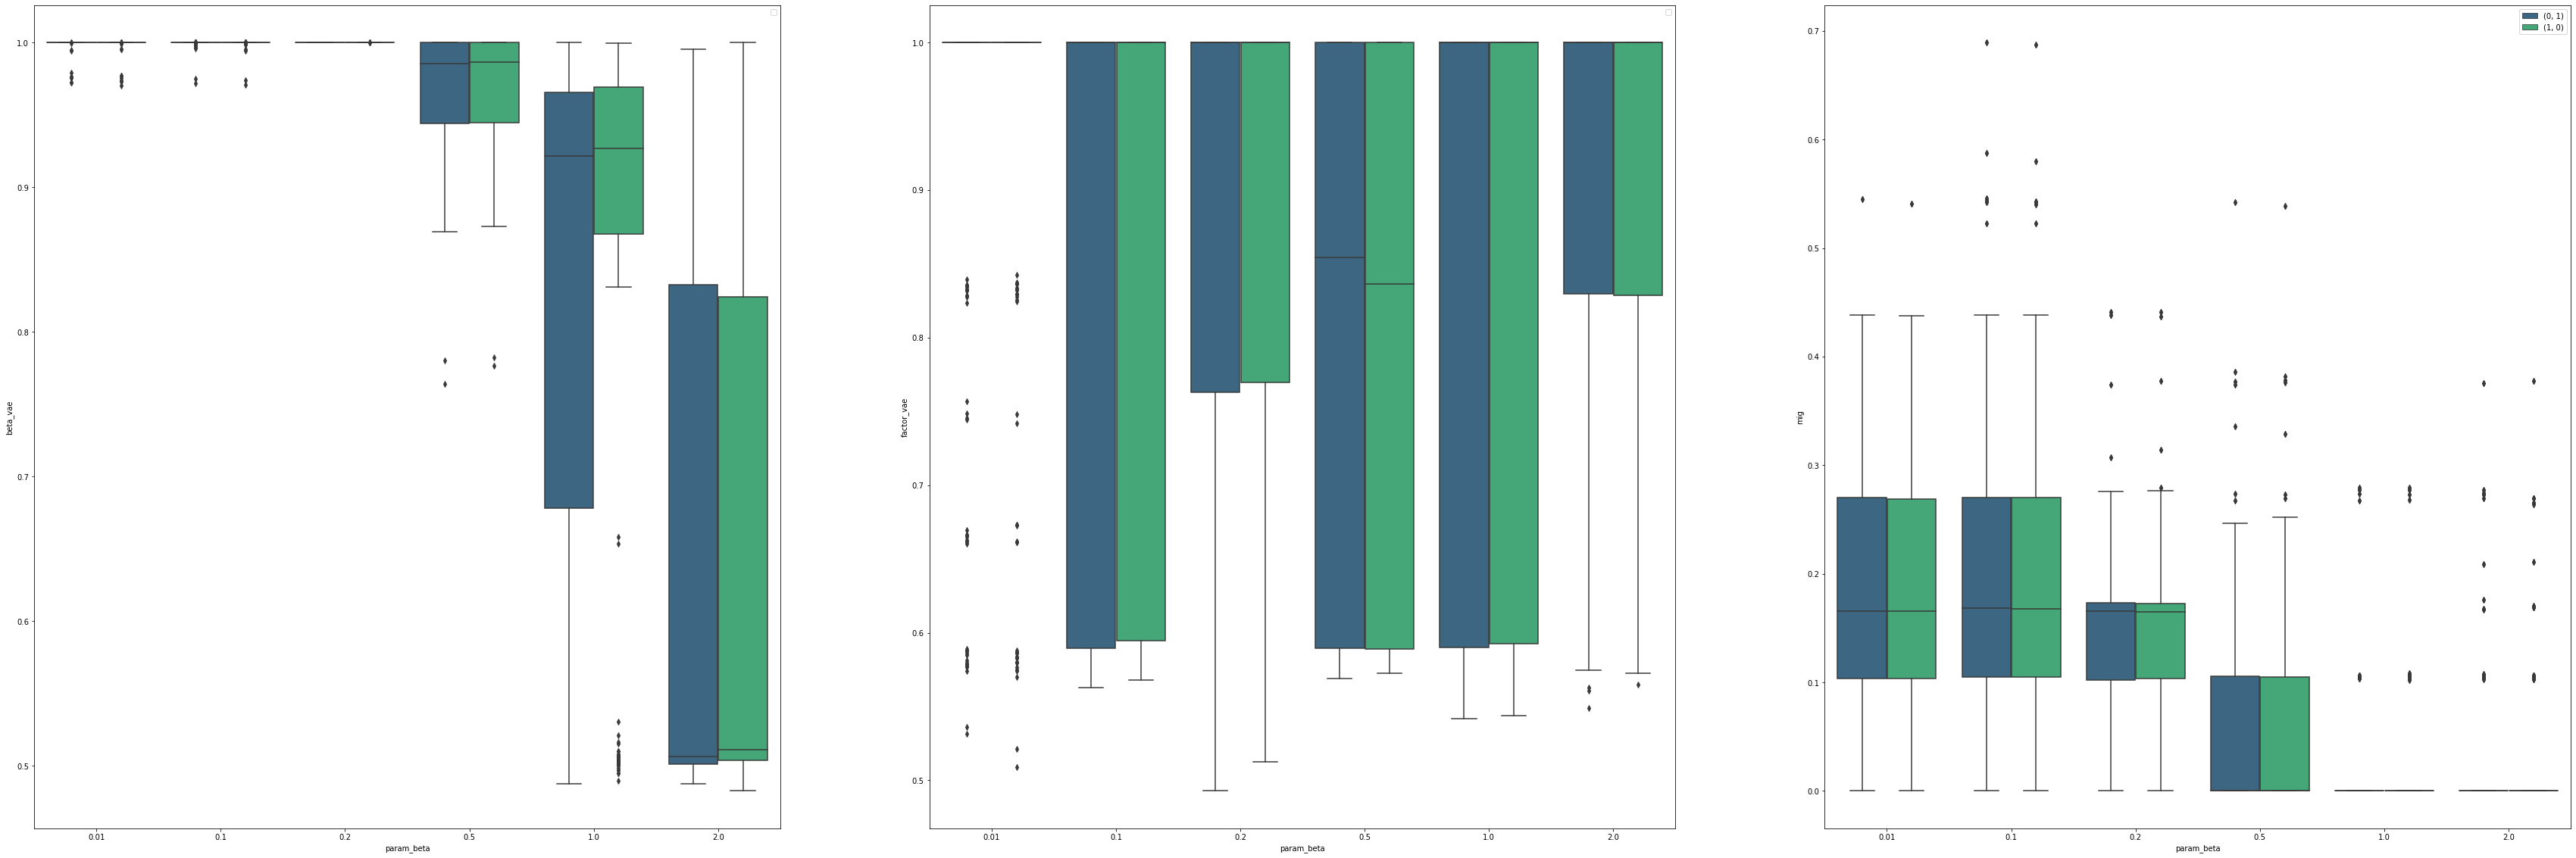

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(60, 20))
sns.boxplot(data=df1, x='param_beta', y='beta_vae', hue='permutation', palette='viridis', ax=axs[0])
sns.boxplot(data=df1, x='param_beta', y='factor_vae', hue='permutation', palette='viridis', ax=axs[1])
sns.boxplot(data=df1, x='param_beta', y='mig', hue='permutation', palette='viridis', ax=axs[2])
axs[0].legend([])
axs[1].legend([])
plt.legend(loc='upper right')

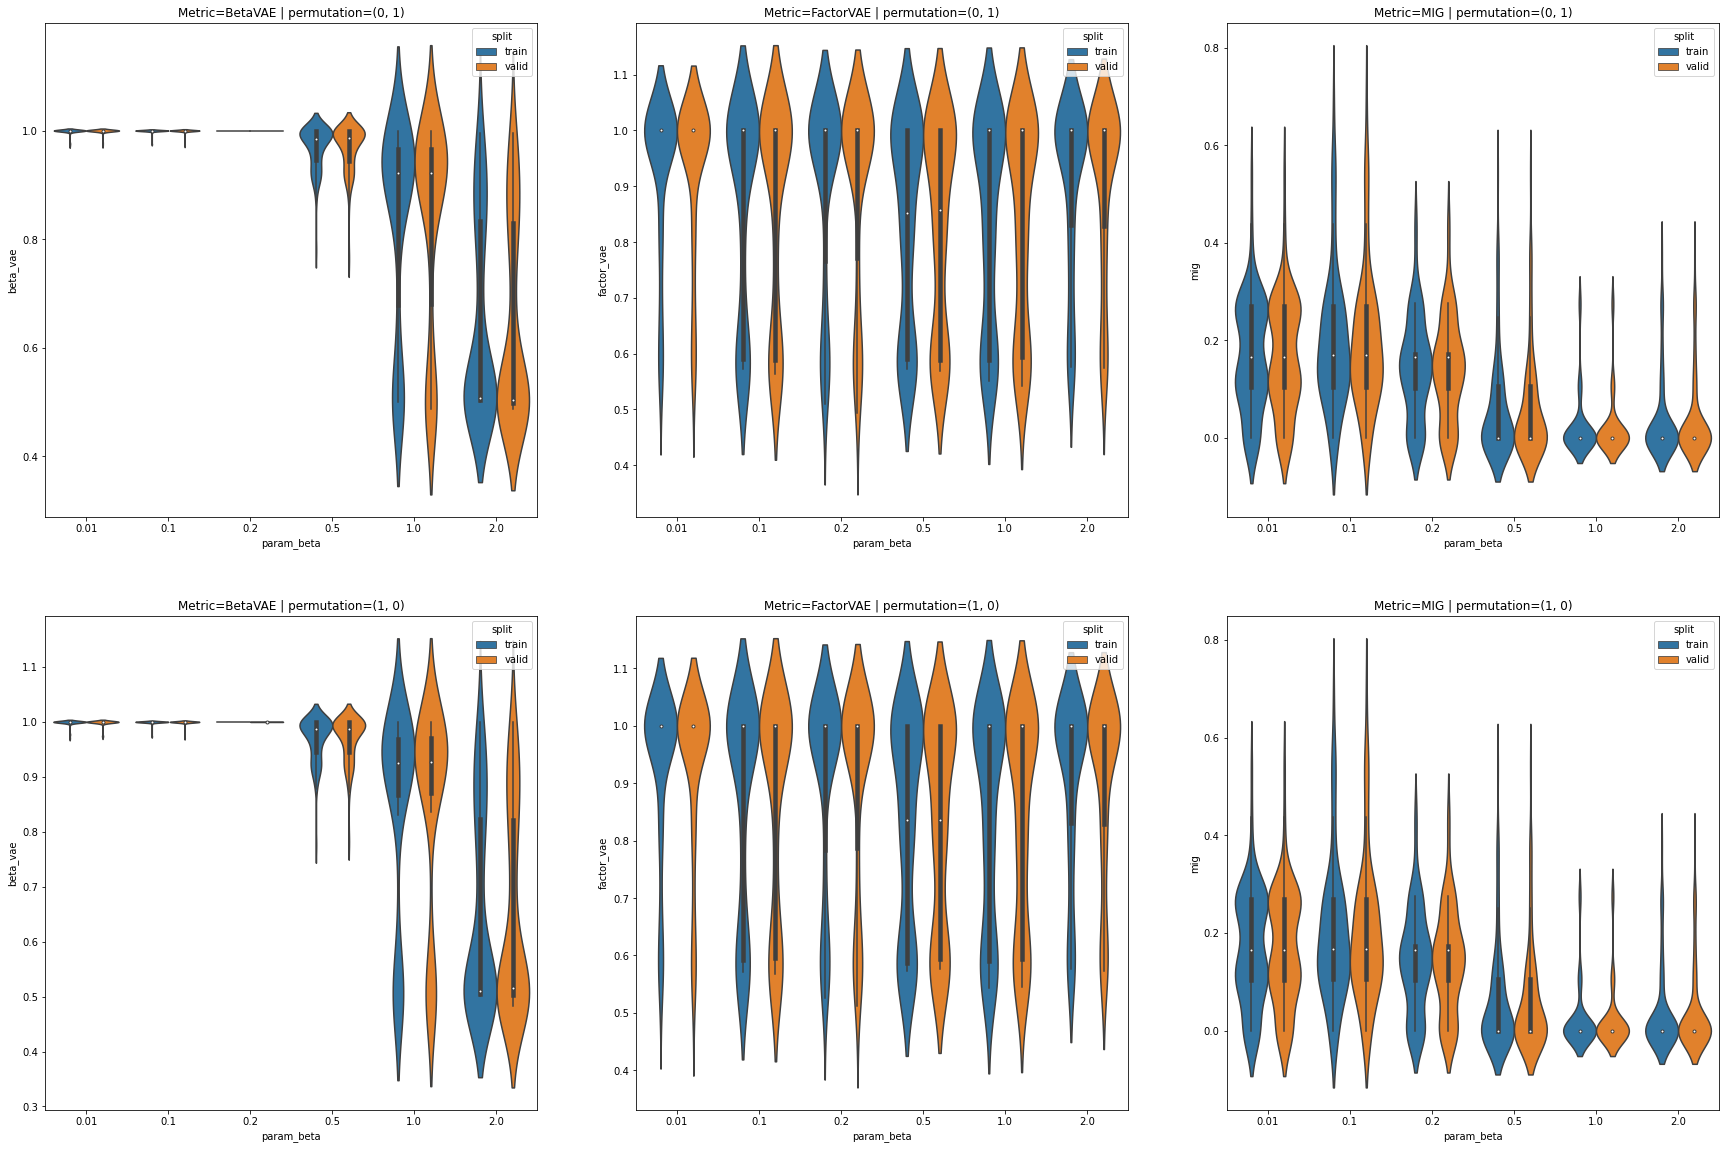

In [14]:
fig, axs = plt.subplots(2, 3, figsize=(30, 20))
axs_ = axs.ravel()
m = ['BetaVAE', 'FactorVAE', 'MIG']
for i, perm in enumerate(it.permutations(indices, len(indices))):
    for k in range(3):
        axs_[3*i+k].set_title('Metric=' + m[k] + ' | ' + 'permutation='+str(perm)) 
    sns.violinplot(data=df1[df1['permutation'] == str(perm)], x='param_beta', y='beta_vae', hue='split', ax=axs_[3*i])
    sns.violinplot(data=df1[df1['permutation'] == str(perm)], x='param_beta', y='factor_vae', hue='split', ax=axs_[3*i+1])
    sns.violinplot(data=df1[df1['permutation'] == str(perm)], x='param_beta', y='mig', hue='split', ax=axs_[3*i+2])

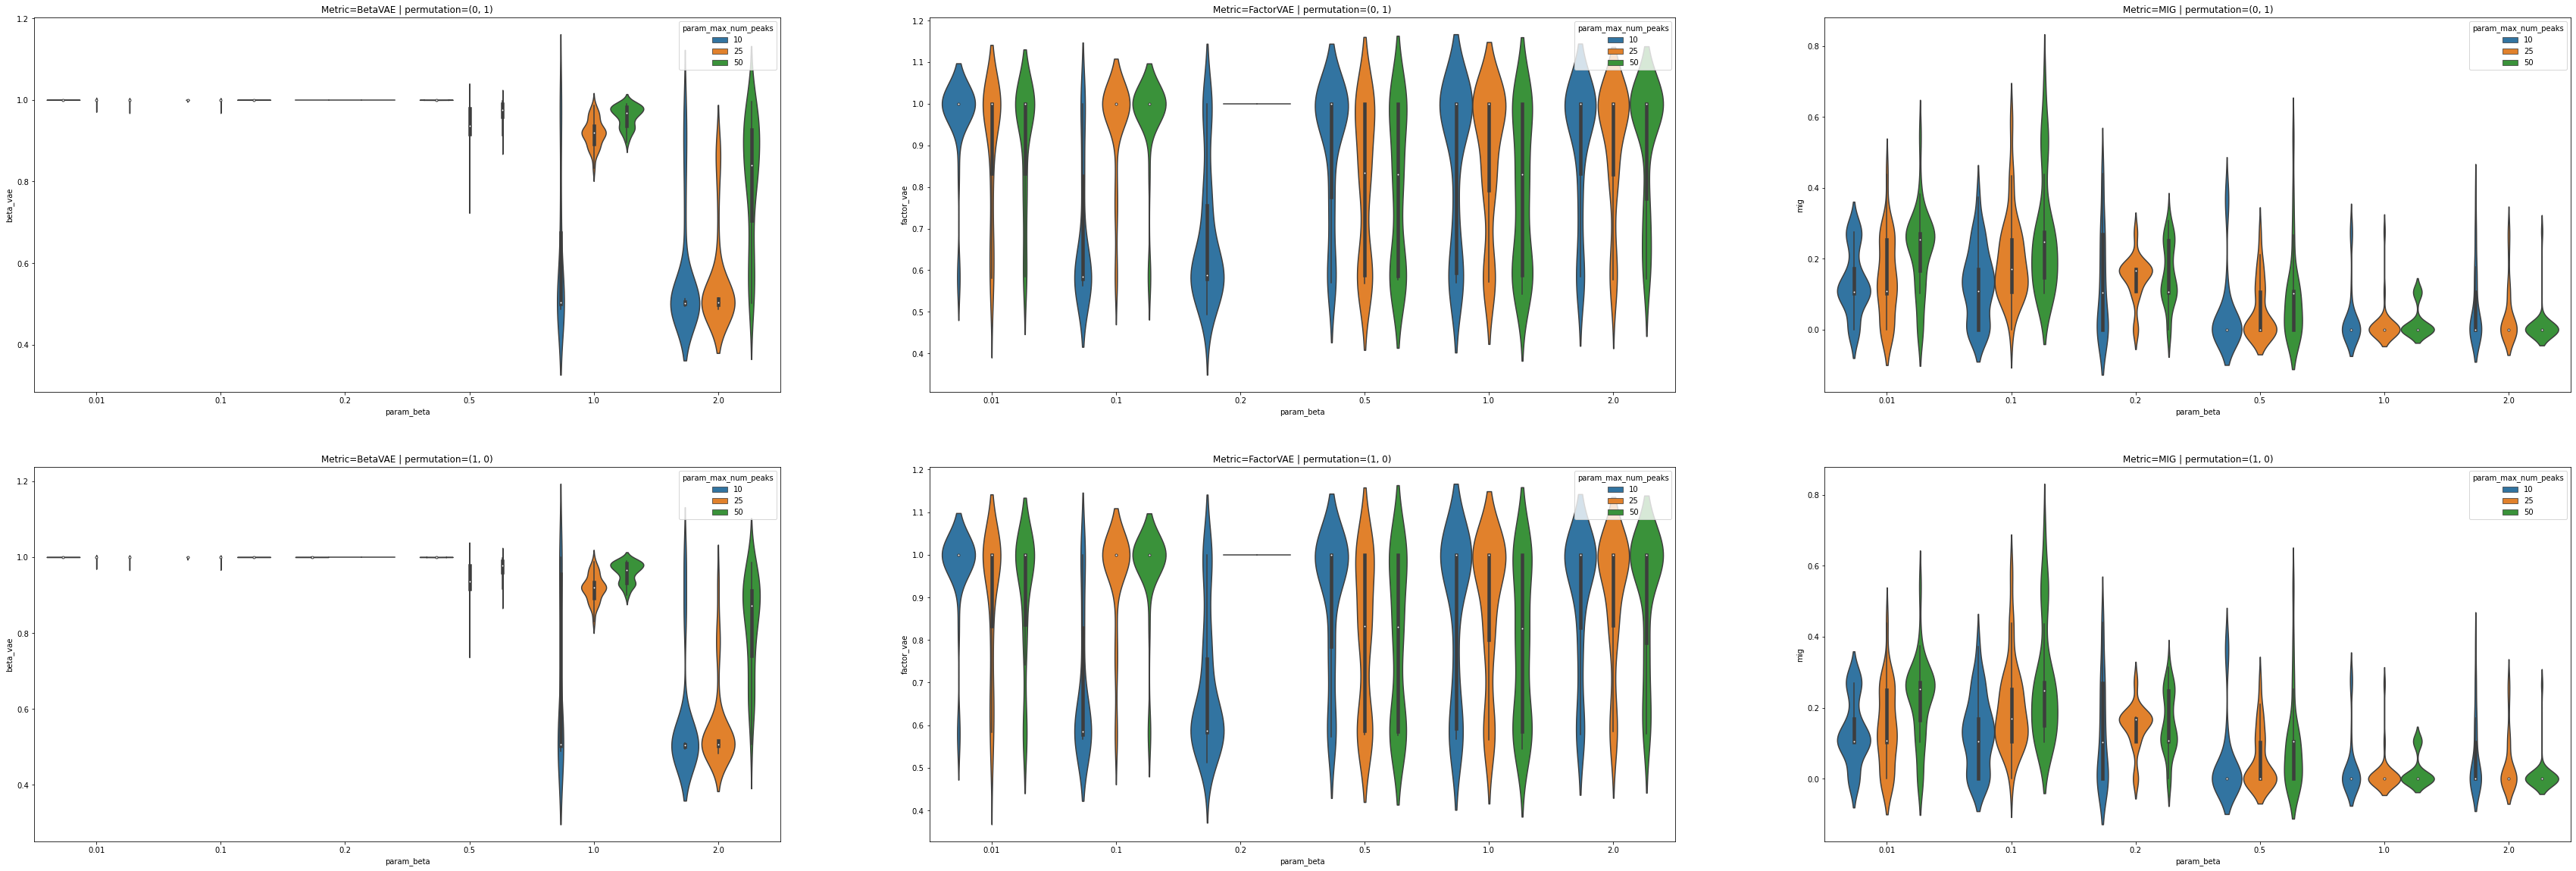

In [15]:
fig, axs = plt.subplots(2, 3, figsize=(60, 20))
axs_ = axs.ravel()
m = ['BetaVAE', 'FactorVAE', 'MIG']
for i, perm in enumerate(it.permutations(indices, len(indices))):
    for k in range(3):
        axs_[3*i+k].set_title('Metric=' + m[k] + ' | ' + 'permutation='+str(perm)) 
    sns.violinplot(data=df1[df1['permutation'] == str(perm)], x='param_beta', y='beta_vae', hue='param_max_num_peaks', ax=axs_[3*i])
    sns.violinplot(data=df1[df1['permutation'] == str(perm)], x='param_beta', y='factor_vae', hue='param_max_num_peaks', ax=axs_[3*i+1])
    sns.violinplot(data=df1[df1['permutation'] == str(perm)], x='param_beta', y='mig', hue='param_max_num_peaks', ax=axs_[3*i+2])

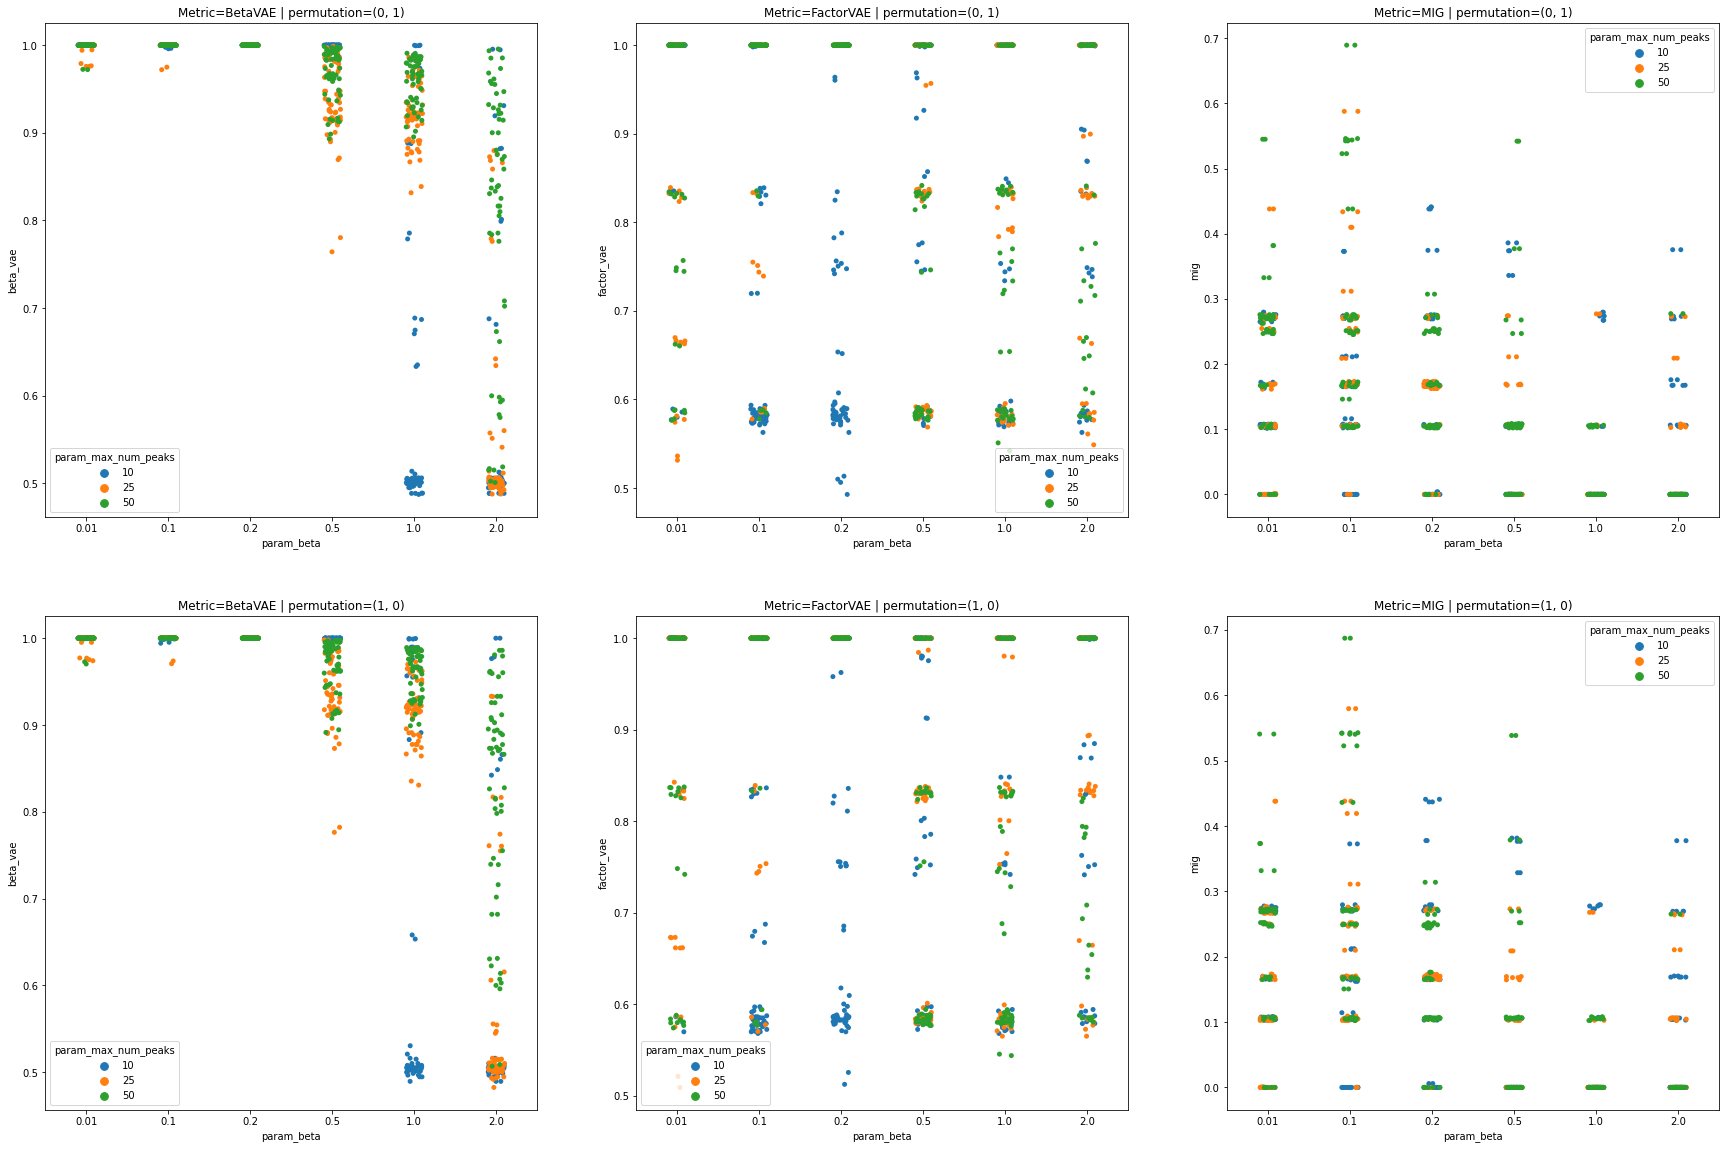

In [16]:
fig, axs = plt.subplots(2, 3, figsize=(30, 20))
axs_ = axs.ravel()
m = ['BetaVAE', 'FactorVAE', 'MIG']
for i, perm in enumerate(it.permutations(indices, len(indices))):
    for k in range(3):
        axs_[3*i+k].set_title('Metric=' + m[k] + ' | ' + 'permutation='+str(perm)) 
    sns.stripplot(data=df1[df1['permutation'] == str(perm)], x='param_beta', y='beta_vae', hue='param_max_num_peaks', ax=axs_[3*i])
    sns.stripplot(data=df1[df1['permutation'] == str(perm)], x='param_beta', y='factor_vae', hue='param_max_num_peaks', ax=axs_[3*i+1])
    sns.stripplot(data=df1[df1['permutation'] == str(perm)], x='param_beta', y='mig', hue='param_max_num_peaks', ax=axs_[3*i+2])

### Disentanglement scores rank correlation per permutation

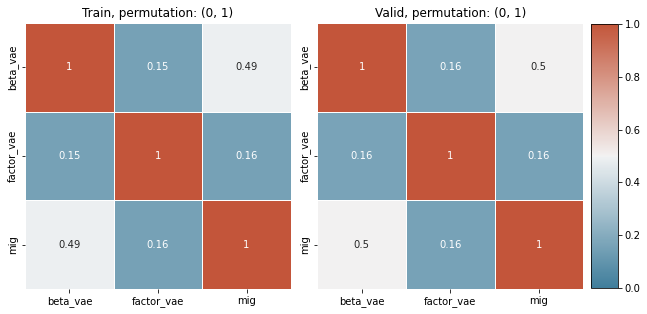

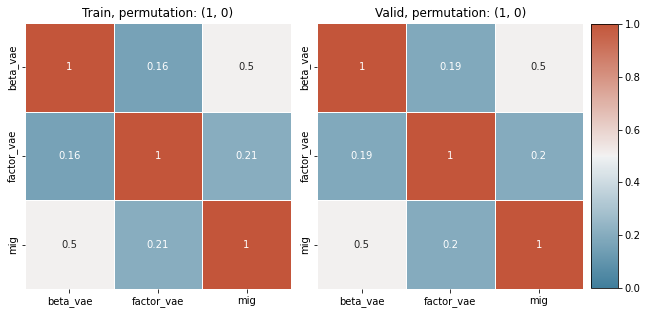

In [17]:
import scipy.stats
cmap = sns.diverging_palette(230, 20, as_cmap=True)

for perm in it.permutations(indices, len(indices)):
    dfp_train = df1[df1['permutation'].isin([str(perm)]) & df1['split'].isin(['train'])][['beta_vae', 'factor_vae', 'mig']]
    dfp_valid = df1[df1['permutation'].isin([str(perm)]) & df1['split'].isin(['valid'])][['beta_vae', 'factor_vae', 'mig']]
    c1, p1 = scipy.stats.spearmanr(dfp_train)
    c2, p2 = scipy.stats.spearmanr(dfp_valid)
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].set_title('Train, permutation: ' + str(perm))
    axs[1].set_title('Valid, permutation: ' + str(perm))
    sns.heatmap(c1, cmap=cmap, square=True, ax=axs[0], vmin=0.0, vmax=1.0, annot=True, linewidths=.5, center=0.5,
        xticklabels=['beta_vae', 'factor_vae', 'mig'], yticklabels=['beta_vae', 'factor_vae', 'mig'], cbar=False)
    sns.heatmap(c2, cmap=cmap, square=True, ax=axs[1], vmin=0.0, vmax=1.0, annot=True, linewidths=.5, center=0.5,
        xticklabels=['beta_vae', 'factor_vae', 'mig'], yticklabels=['beta_vae', 'factor_vae', 'mig'], cbar=False)
    fig.colorbar(axs[0].get_children()[0], ax=axs.ravel().tolist(), aspect=10., anchor=(1.6, 0.5), shrink=0.97)
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()


### Pairwise scatter plot for different disentanglement metrics

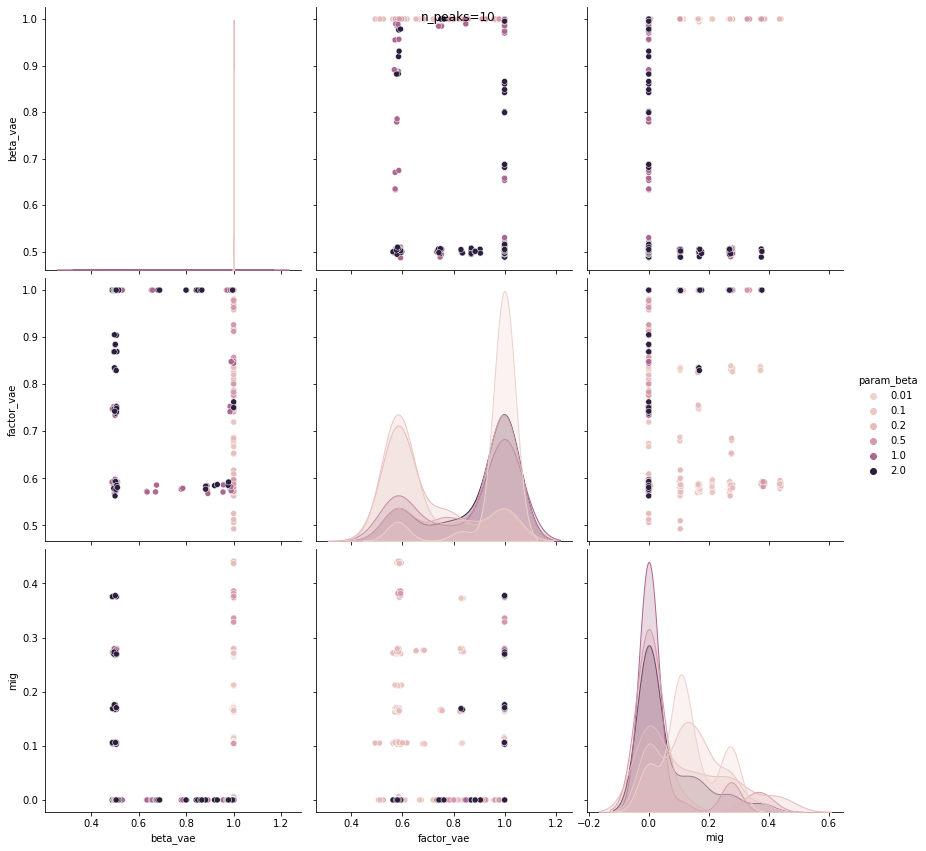

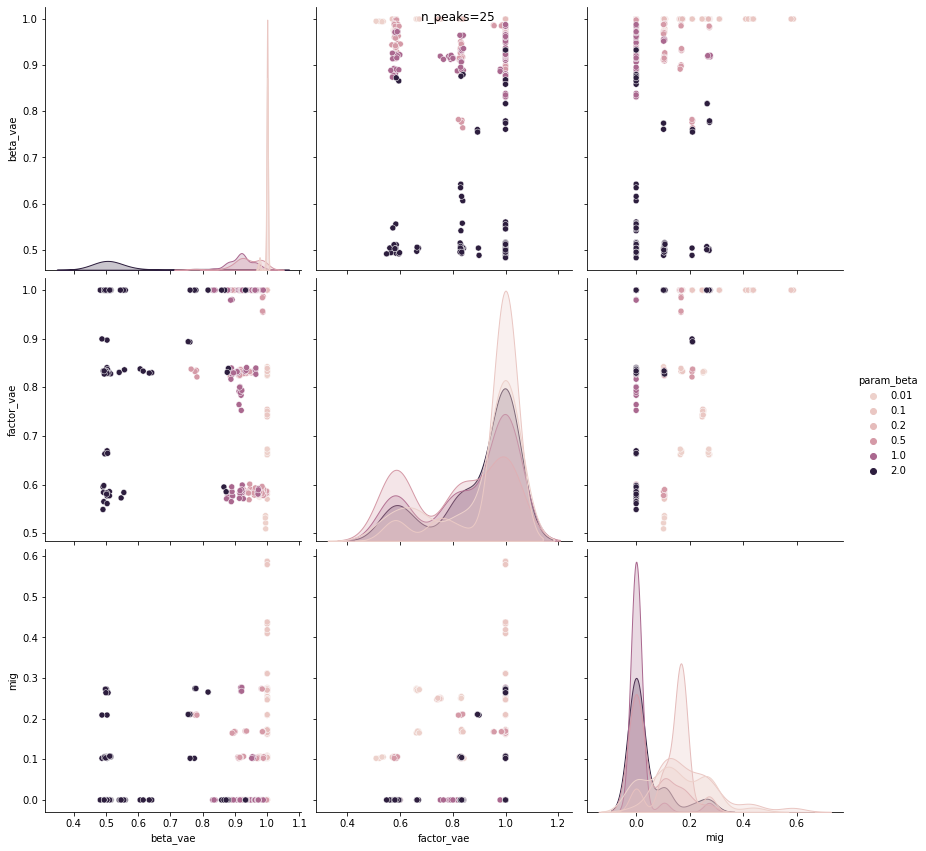

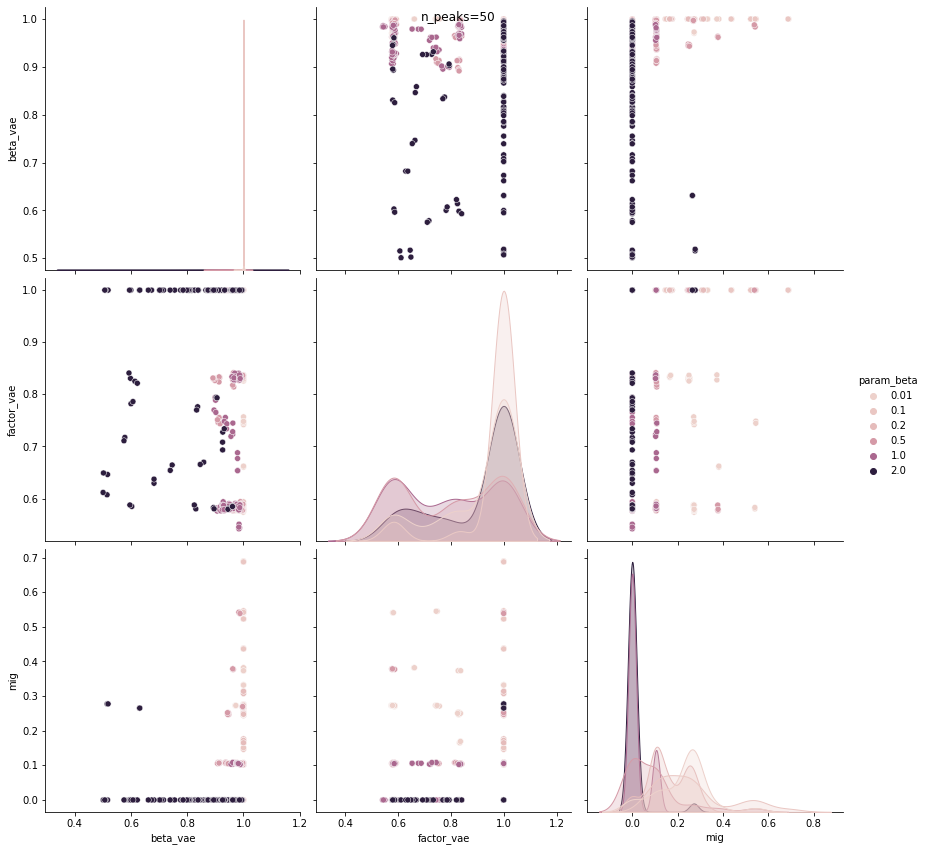

In [18]:
for n_peaks in df1['param_max_num_peaks'].unique():
    g = sns.pairplot(df1[df1['param_max_num_peaks'] == n_peaks][['beta_vae', 'factor_vae', 'mig', 'param_beta']], hue='param_beta', height=4)
    g.fig.suptitle('n_peaks=' + str(n_peaks))

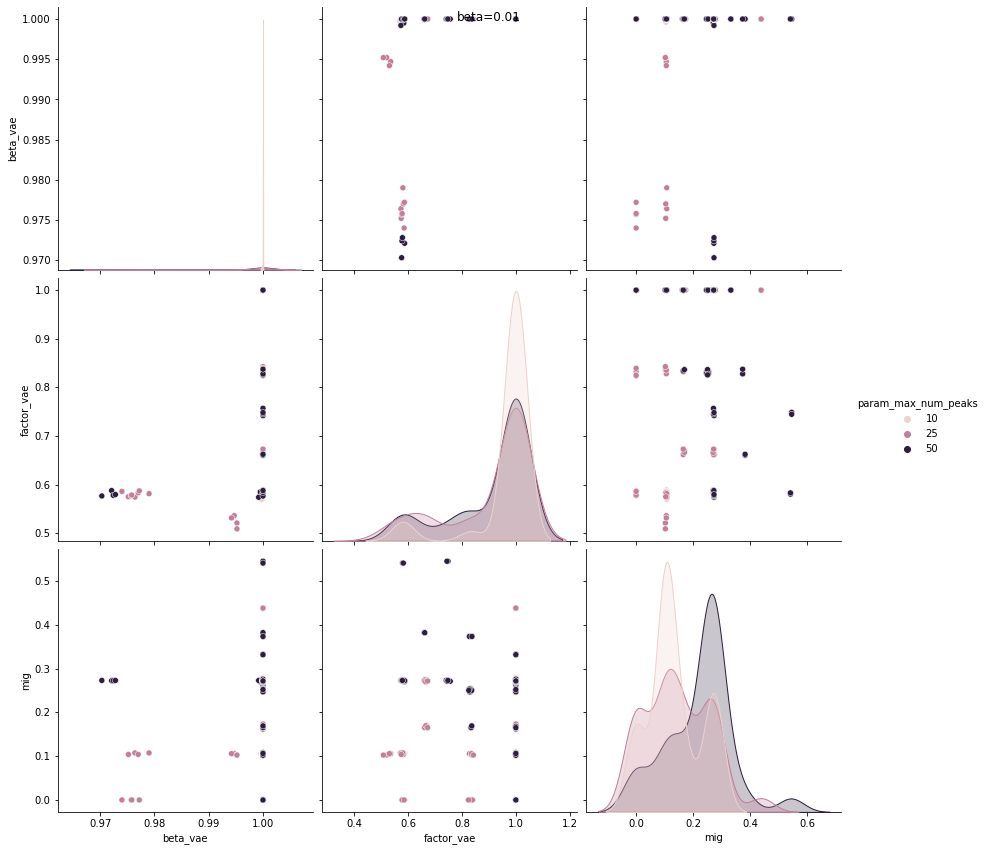

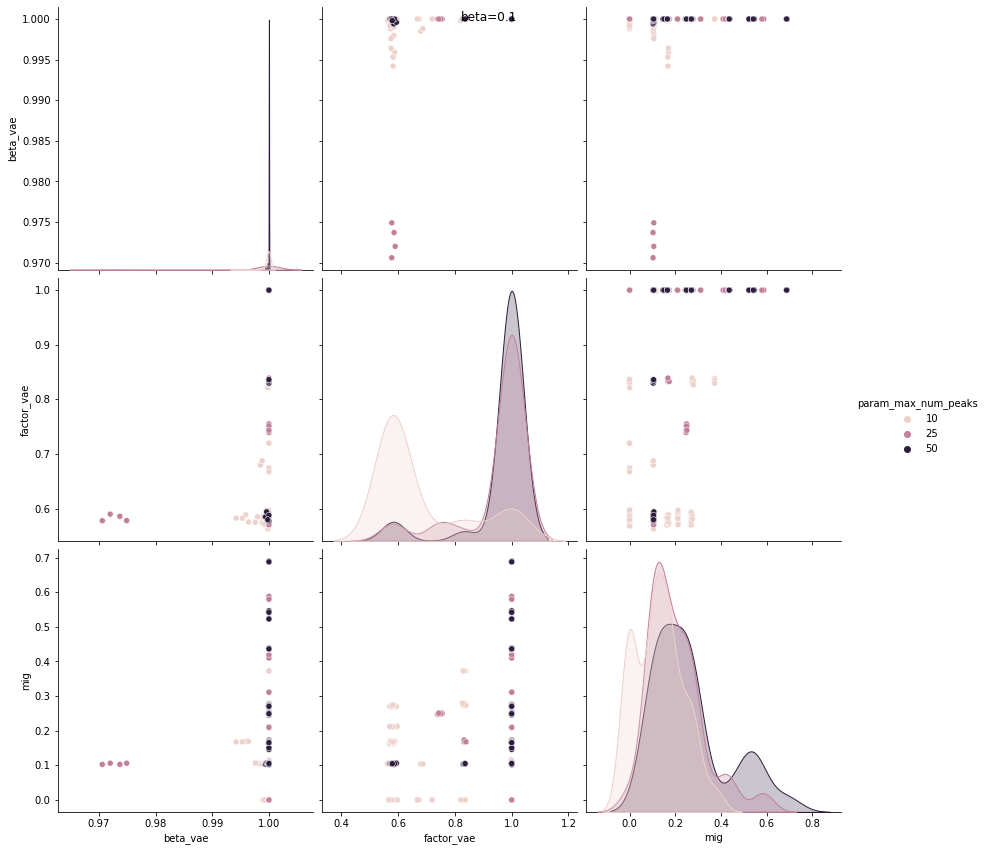

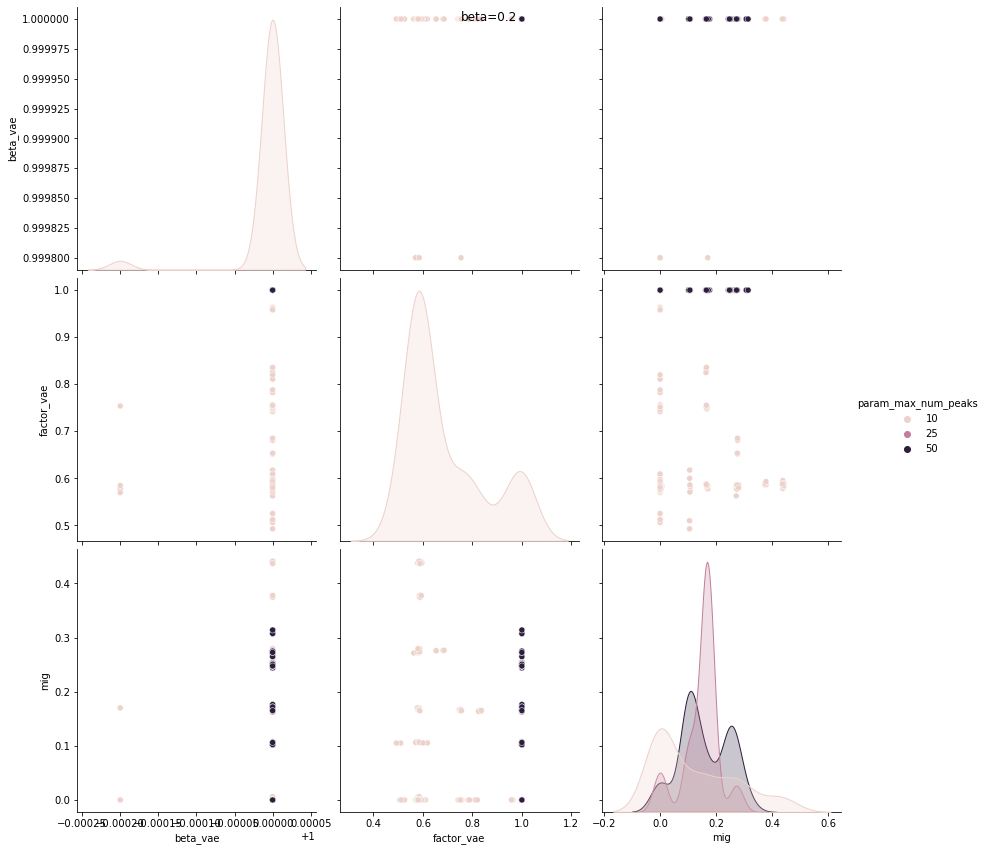

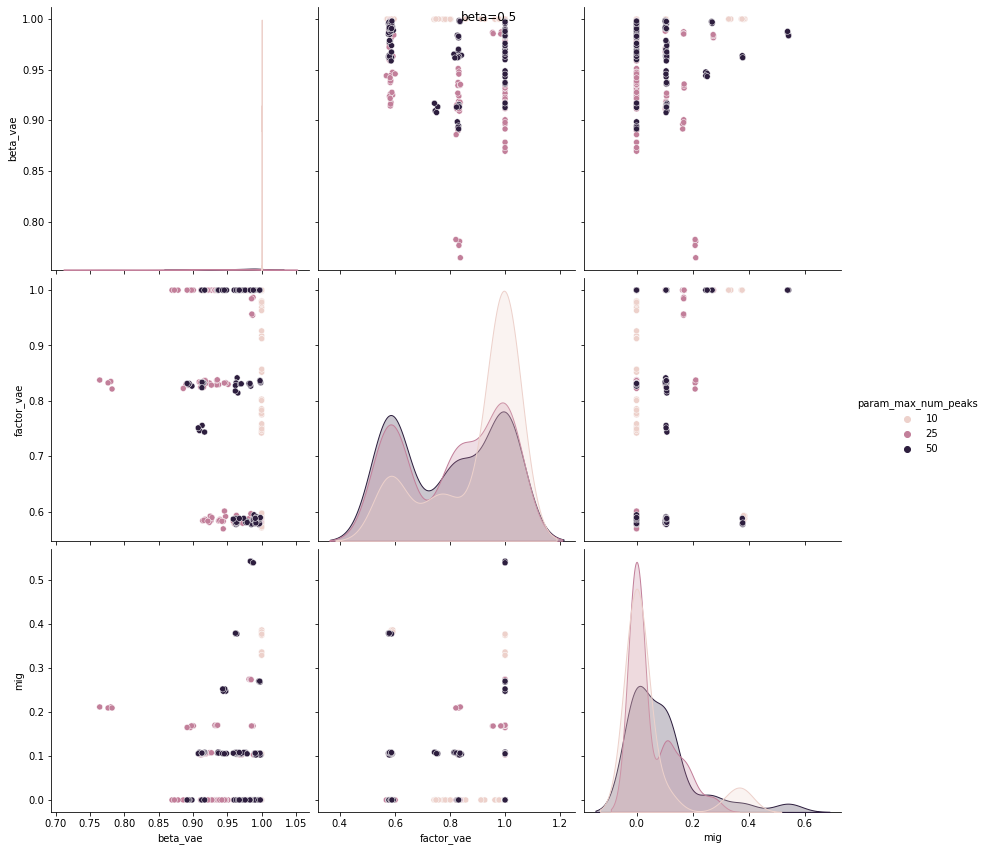

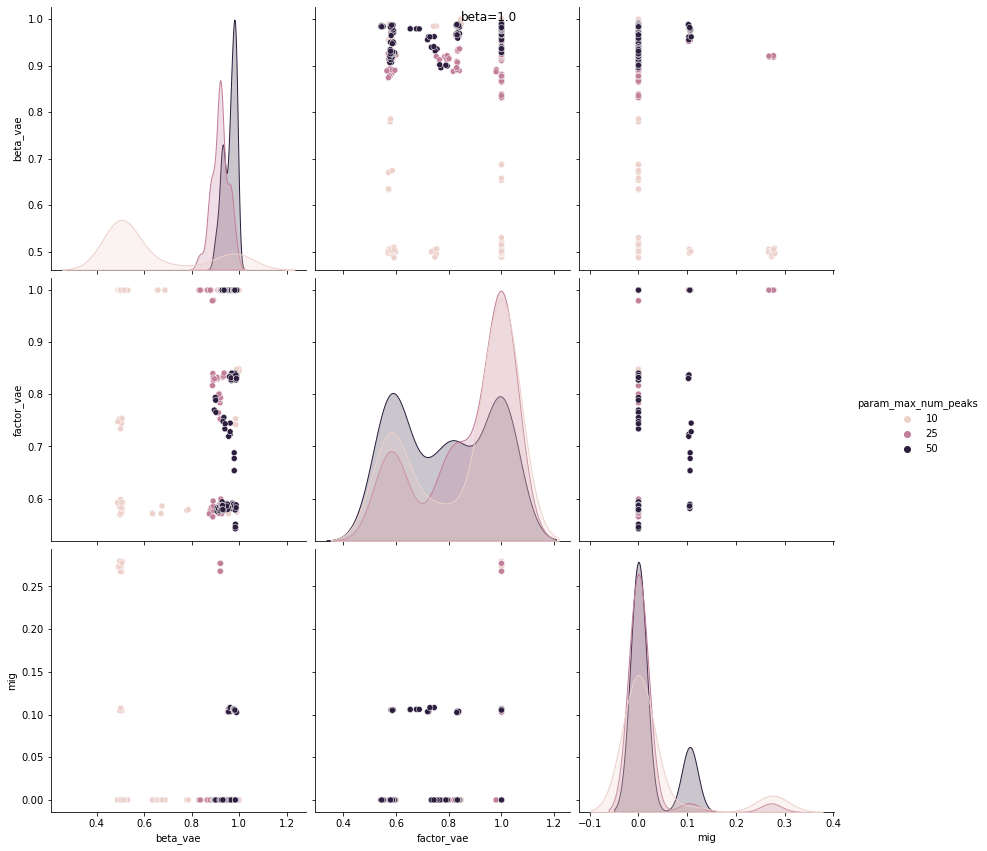

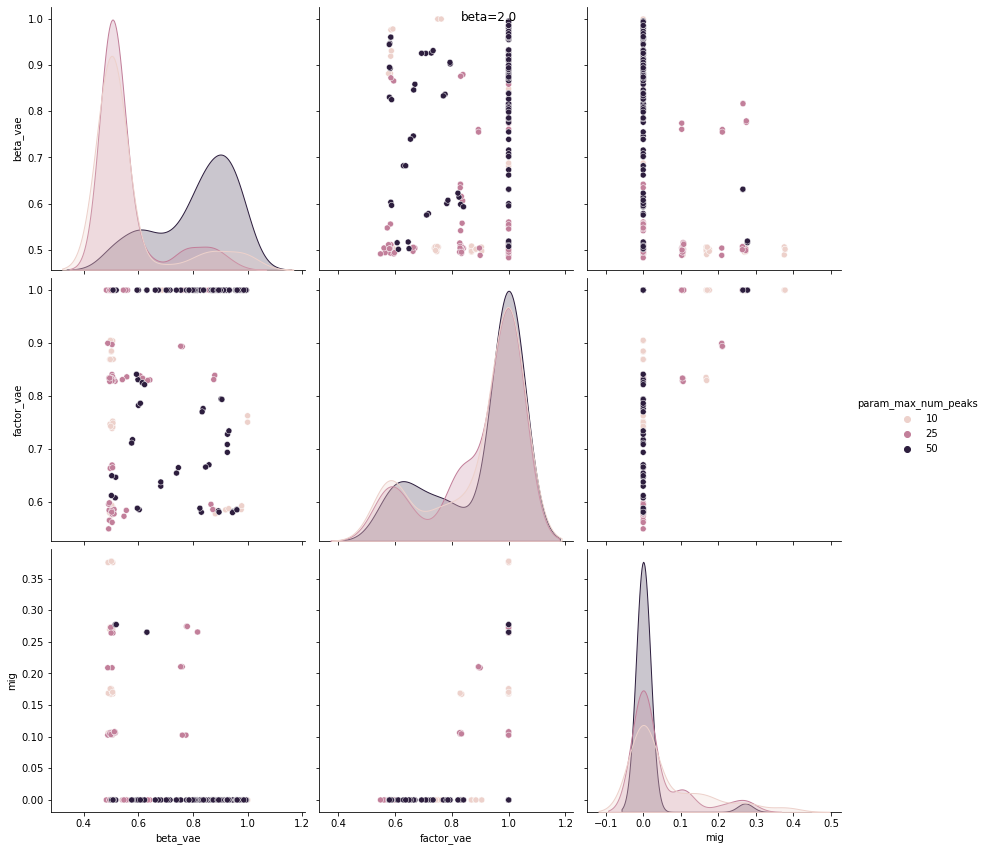

In [19]:
for beta in df1['param_beta'].unique():
    g = sns.pairplot(df1[df1['param_beta'] == beta][['beta_vae', 'factor_vae', 'mig', 'param_max_num_peaks']], hue='param_max_num_peaks', height=4)
    g.fig.suptitle('beta=' + str(beta))

### Variance of the disentanglement scores explained by different factors

#### Preprocess factors

In [20]:
# Assign categorical id to continuous variable: param_beta
param_beta_unique = df1['param_beta'].unique()
param_beta_map = dict(zip(param_beta_unique, range(len(param_beta_unique))))
df1['param_beta_id'] = df1.apply(lambda row: param_beta_map[row['param_beta']], axis=1)
param_beta_map, df1['param_beta_id'].unique()

({0.01: 0, 0.1: 1, 0.2: 2, 0.5: 3, 1.0: 4, 2.0: 5},
 array([0, 1, 2, 3, 4, 5], dtype=int64))

In [21]:
# Assign categorical id to continuous variable: n_peaks
n_peaks_unique = df1['param_max_num_peaks'].unique()
n_peaks_map = dict(zip(n_peaks_unique, range(len(n_peaks_unique))))
df1['param_max_num_peaks_id'] = df1.apply(lambda row: n_peaks_map[row['param_max_num_peaks']], axis=1)
n_peaks_map, df1['param_max_num_peaks_id'].unique()

({10: 0, 25: 1, 50: 2}, array([0, 1, 2], dtype=int64))

In [22]:
# Assign categorical id to continuous variable: layer_config
def reduce_layer_config(row):
    layer_config = ast.literal_eval(row['layer_config'])
    encoder, decoder = layer_config[0][1:], layer_config[1][:-1]
    return str([encoder, decoder])

df1['arch'] = df1.apply(reduce_layer_config, axis=1)
arch_unique = df1['arch'].unique()
arch_map = dict(zip(arch_unique, range(len(arch_unique))))
df1['arch_id'] = df1.apply(lambda row: arch_map[row['arch']], axis=1)
arch_map, df1['arch_id'].unique()

({'[[1600, 2], [2, 1600]]': 0,
  '[[800, 2], [2, 800]]': 1,
  '[[400, 2], [2, 400]]': 2,
  '[[200, 2], [2, 200]]': 3,
  '[[100, 2], [2, 100]]': 4,
  '[[50, 2], [2, 50]]': 5,
  '[[1600, 100, 2], [2, 100, 1600]]': 6,
  '[[800, 100, 2], [2, 100, 800]]': 7,
  '[[400, 100, 2], [2, 100, 400]]': 8,
  '[[200, 100, 2], [2, 100, 200]]': 9,
  '[[100, 90, 2], [2, 90, 100]]': 10,
  '[[1600, 200, 50, 2], [2, 50, 200, 1600]]': 11,
  '[[800, 200, 50, 2], [2, 50, 200, 800]]': 12,
  '[[400, 200, 50, 2], [2, 50, 200, 400]]': 13,
  '[[200, 100, 50, 2], [2, 50, 100, 200]]': 14,
  '[[100, 90, 50, 2], [2, 50, 90, 100]]': 15,
  '[[1600, 2], [2, 100, 1600]]': 16,
  '[[800, 2], [2, 100, 800]]': 17,
  '[[400, 2], [2, 100, 400]]': 18,
  '[[300, 2], [2, 100, 300]]': 19,
  '[[200, 2], [2, 100, 200]]': 20,
  '[[100, 2], [2, 90, 100]]': 21,
  '[[50, 2], [2, 40, 50]]': 22,
  '[[1600, 100, 2], [2, 1600]]': 23,
  '[[800, 100, 2], [2, 800]]': 24,
  '[[400, 100, 2], [2, 400]]': 25,
  '[[200, 100, 2], [2, 200]]': 26,
  '[[

#### One hot encode

In [23]:
def one_hot_encode(df, name):
    id = df[name].to_numpy()
    ids = np.unique(id)
    n_values = np.max(ids) + 1
    return np.eye(n_values)[id]

In [24]:
param_beta_ohe = one_hot_encode(df1, 'param_beta_id')
n_peaks_ohe = one_hot_encode(df1, 'param_max_num_peaks_id')
arch_ohe = one_hot_encode(df1, 'arch_id')
param_beta_ohe.shape, n_peaks_ohe.shape, arch_ohe.shape

((2088, 6), (2088, 3), (2088, 29))

In [25]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as skm

def linear_regression(X, y):
    reg = LinearRegression().fit(X, y)
    y_pred = reg.predict(X)

    mse = skm.mean_squared_error(y, y_pred)
    mae = skm.mean_absolute_error(y, y_pred)
    me  = skm.max_error(y, y_pred)
    evs = skm.explained_variance_score(y, y_pred)
    return mse, mae, me, evs

In [26]:
scores = []

In [27]:
score_name = 'beta_vae'
X = np.hstack((param_beta_ohe, n_peaks_ohe, arch_ohe))
y = df1[score_name].to_numpy()
mse, mae, me, evs = linear_regression(X, y)
scores.append([mse, mae, me, evs, score_name, 1, 1, 1])

X = np.hstack((param_beta_ohe, n_peaks_ohe))
y = df1[score_name].to_numpy()
mse, mae, me, evs = linear_regression(X, y)
scores.append([mse, mae, me, evs, score_name, 1, 1, 0])

X = np.hstack((param_beta_ohe, arch_ohe))
y = df1[score_name].to_numpy()
mse, mae, me, evs = linear_regression(X, y)
scores.append([mse, mae, me, evs, score_name, 1, 0, 1])

X = np.hstack((n_peaks_ohe, arch_ohe))
y = df1[score_name].to_numpy()
mse, mae, me, evs = linear_regression(X, y)
scores.append([mse, mae, me, evs, score_name, 0, 1, 1])

X = param_beta_ohe
y = df1[score_name].to_numpy()
mse, mae, me, evs = linear_regression(X, y)
scores.append([mse, mae, me, evs, score_name, 1, 0, 0])

X = n_peaks_ohe
y = df1[score_name].to_numpy()
mse, mae, me, evs = linear_regression(X, y)
scores.append([mse, mae, me, evs, score_name, 0, 1, 0])

X = arch_ohe
y = df1[score_name].to_numpy()
mse, mae, me, evs = linear_regression(X, y)
scores.append([mse, mae, me, evs, score_name, 0, 0, 1])

In [28]:
score_name = 'factor_vae'
X = np.hstack((param_beta_ohe, n_peaks_ohe, arch_ohe))
y = df1[score_name].to_numpy()
mse, mae, me, evs = linear_regression(X, y)
scores.append([mse, mae, me, evs, score_name, 1, 1, 1])

X = np.hstack((param_beta_ohe, n_peaks_ohe))
y = df1[score_name].to_numpy()
mse, mae, me, evs = linear_regression(X, y)
scores.append([mse, mae, me, evs, score_name, 1, 1, 0])

X = np.hstack((param_beta_ohe, arch_ohe))
y = df1[score_name].to_numpy()
mse, mae, me, evs = linear_regression(X, y)
scores.append([mse, mae, me, evs, score_name, 1, 0, 1])

X = np.hstack((n_peaks_ohe, arch_ohe))
y = df1[score_name].to_numpy()
mse, mae, me, evs = linear_regression(X, y)
scores.append([mse, mae, me, evs, score_name, 0, 1, 1])

X = param_beta_ohe
y = df1[score_name].to_numpy()
mse, mae, me, evs = linear_regression(X, y)
scores.append([mse, mae, me, evs, score_name, 1, 0, 0])

X = n_peaks_ohe
y = df1[score_name].to_numpy()
mse, mae, me, evs = linear_regression(X, y)
scores.append([mse, mae, me, evs, score_name, 0, 1, 0])

X = arch_ohe
y = df1[score_name].to_numpy()
mse, mae, me, evs = linear_regression(X, y)
scores.append([mse, mae, me, evs, score_name, 0, 0, 1])

In [29]:
score_name = 'mig'
X = np.hstack((param_beta_ohe, n_peaks_ohe, arch_ohe))
y = df1[score_name].to_numpy()
mse, mae, me, evs = linear_regression(X, y)
scores.append([mse, mae, me, evs, score_name, 1, 1, 1])

X = np.hstack((param_beta_ohe, n_peaks_ohe))
y = df1[score_name].to_numpy()
mse, mae, me, evs = linear_regression(X, y)
scores.append([mse, mae, me, evs, score_name, 1, 1, 0])

X = np.hstack((param_beta_ohe, arch_ohe))
y = df1[score_name].to_numpy()
mse, mae, me, evs = linear_regression(X, y)
scores.append([mse, mae, me, evs, score_name, 1, 0, 1])

X = np.hstack((n_peaks_ohe, arch_ohe))
y = df1[score_name].to_numpy()
mse, mae, me, evs = linear_regression(X, y)
scores.append([mse, mae, me, evs, score_name, 0, 1, 1])

X = param_beta_ohe
y = df1[score_name].to_numpy()
mse, mae, me, evs = linear_regression(X, y)
scores.append([mse, mae, me, evs, score_name, 1, 0, 0])

X = n_peaks_ohe
y = df1[score_name].to_numpy()
mse, mae, me, evs = linear_regression(X, y)
scores.append([mse, mae, me, evs, score_name, 0, 1, 0])

X = arch_ohe
y = df1[score_name].to_numpy()
mse, mae, me, evs = linear_regression(X, y)
scores.append([mse, mae, me, evs, score_name, 0, 0, 1])

In [30]:
df_scores = pd.DataFrame(scores, columns=['MSE', 'MAE', 'ME', 'EVS', 'target_value', 'param_beta', 'n_peaks', 'arch'])
df_scores

,MSE,MAE,ME,EVS,target_value,param_beta,n_peaks,arch
0,0.010004,0.072775,0.402157,0.653531,beta_vae,1,1,1
1,0.010168,0.072380,0.402344,0.647875,beta_vae,1,1,0
2,0.011393,0.063304,0.374233,0.605444,beta_vae,1,0,1
3,0.027322,0.120806,0.460670,0.053772,beta_vae,0,1,1
4,0.011556,0.059612,0.356628,0.599782,beta_vae,1,0,0
5,0.027485,0.121832,0.458473,0.048145,beta_vae,0,1,0
6,0.028714,0.124207,0.448438,0.005573,beta_vae,0,0,1
7,0.026303,0.136767,0.438266,0.123062,factor_vae,1,1,1
8,0.027867,0.144298,0.438266,0.070907,factor_vae,1,1,0
9,0.027322,0.140519,0.426145,0.089074,factor_vae,1,0,1


In [31]:
index = df_scores[df_scores['target_value'] == 'beta_vae'].copy()[['param_beta', 'n_peaks', 'arch']]
beta_vae_score = df_scores[df_scores['target_value'] == 'beta_vae'].copy()[['MSE', 'MAE', 'ME', 'EVS']]
factor_vae_score = df_scores[df_scores['target_value'] == 'factor_vae'].copy()[['MSE', 'MAE', 'ME', 'EVS']]
factor_vae_score.index = beta_vae_score.index
mig_score = df_scores[df_scores['target_value'] == 'mig'].copy()[['MSE', 'MAE', 'ME', 'EVS']]
mig_score.index = factor_vae_score.index
df_scores_ = pd.concat([beta_vae_score, factor_vae_score, mig_score], axis=1, ignore_index=True)
df_scores_= df_scores_.rename(columns={
    0: "beta_vae_MSE", 1: "beta_vae_MAE", 2: 'beta_vae_ME', 3: 'beta_vae_EVS',
    4: "factor_vae_MSE", 5: "factor_vae_MAE", 6: 'factor_vae_ME', 7: 'factor_vae_EVS',
    8: "mig_MSE", 9: "mig_MAE", 10: 'mig_ME', 11: 'mig_EVS'})

for col in df_scores_.columns:
    df_scores_[col] = np.log10(df_scores_[col] + 1.)
df_scores = pd.concat([df_scores_, index], axis=1)
df_scores['config'] = 'Config'
df_scores

,beta_vae_MSE,beta_vae_MAE,beta_vae_ME,beta_vae_EVS,factor_vae_MSE,factor_vae_MAE,factor_vae_ME,factor_vae_EVS,mig_MSE,mig_MAE,mig_ME,mig_EVS,param_beta,n_peaks,arch,config
0,0.004323,0.030508,0.146797,0.218412,0.011275,0.055671,0.157839,0.050404,0.004436,0.030986,0.159525,0.127600,1,1,1,Config
1,0.004393,0.030349,0.146854,0.216924,0.011937,0.058539,0.157839,0.029752,0.004660,0.031564,0.166915,0.116680,1,1,0,Config
2,0.004920,0.026658,0.138060,0.205595,0.011707,0.057102,0.154164,0.037058,0.004540,0.031618,0.167457,0.122561,1,0,1,Config
3,0.011707,0.049531,0.164552,0.022747,0.011710,0.057826,0.145038,0.036966,0.006371,0.040787,0.179847,0.022135,0,1,1,Config
4,0.004990,0.025147,0.132461,0.204061,0.012380,0.059800,0.151003,0.015319,0.004775,0.032282,0.173685,0.110915,1,0,0,Config
5,0.011775,0.049928,0.163898,0.020421,0.012393,0.060570,0.145274,0.014895,0.006605,0.041509,0.193314,0.007390,0,1,0,Config
6,0.012295,0.050846,0.160900,0.002414,0.012159,0.059395,0.150693,0.022578,0.006492,0.041136,0.186398,0.014552,0,0,1,Config


In [32]:
# fig, axs = plt.subplots(figsize=(15, 15))
# axs.scatter(y, y_pred)
# axs.plot([np.min(y) - 0.01, np.max(y) + 0.01], [np.min(y_pred) - 0.01, np.max(y_pred) + 0.01], linestyle='dashed', color='red')

In [33]:
from specvae.visualize import multi_index_heatmap

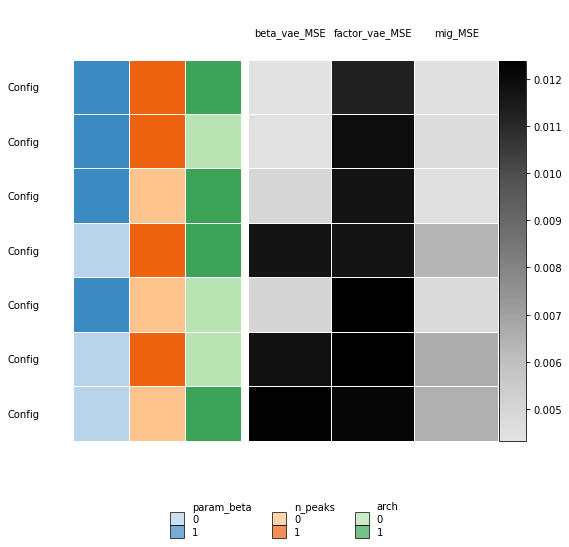

In [34]:
fig = multi_index_heatmap(df_scores,
    feature_column_name='config', 
    row_index_columns=['param_beta', 'n_peaks', 'arch'], 
    sample_columns=['beta_vae_MSE', 'factor_vae_MSE', 'mig_MSE'])

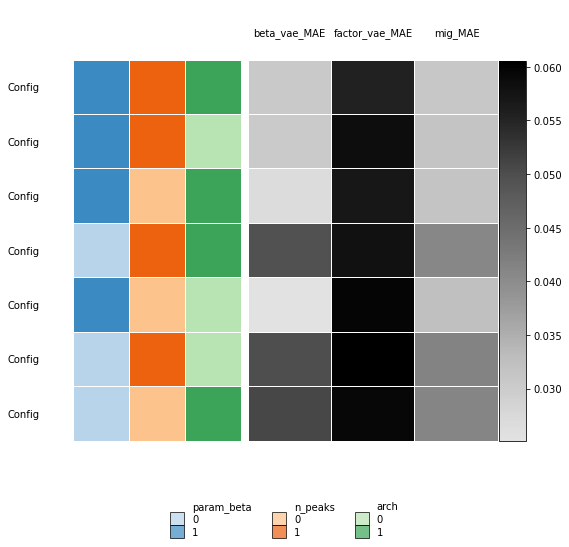

In [35]:
fig = multi_index_heatmap(df_scores,
    feature_column_name='config', 
    row_index_columns=['param_beta', 'n_peaks', 'arch'], 
    sample_columns=['beta_vae_MAE', 'factor_vae_MAE', 'mig_MAE'])

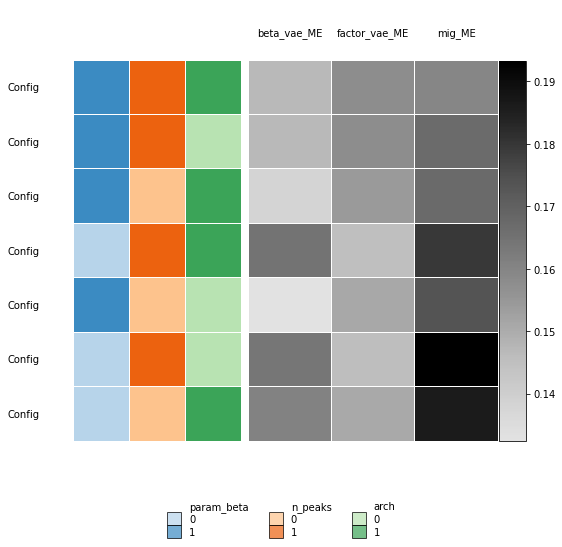

In [36]:
fig = multi_index_heatmap(df_scores,
    feature_column_name='config', 
    row_index_columns=['param_beta', 'n_peaks', 'arch'], 
    sample_columns=['beta_vae_ME', 'factor_vae_ME', 'mig_ME'])

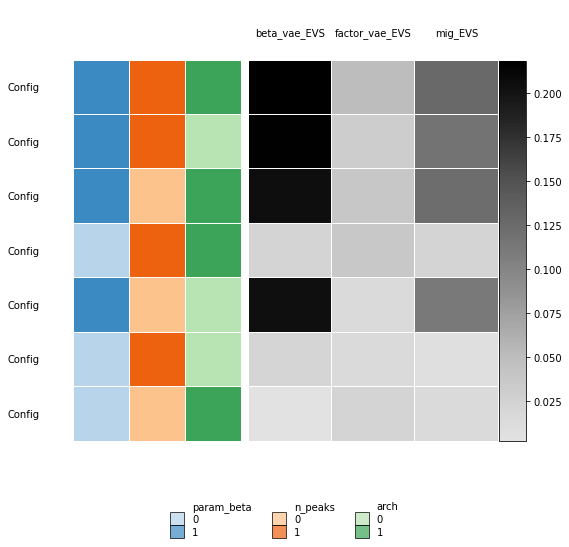

In [37]:
fig = multi_index_heatmap(df_scores,
    feature_column_name='config', 
    row_index_columns=['param_beta', 'n_peaks', 'arch'], 
    sample_columns=['beta_vae_EVS', 'factor_vae_EVS', 'mig_EVS'])